In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [57]:
# All columns
pd.set_option('display.max_columns', None)

# Load the training data
x = pd.read_csv('training_set_features.csv')
y = pd.read_csv('training_set_labels.csv')

In [58]:
# Remove unnecessary columns
x.drop(['health_insurance', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)
x.drop('respondent_id', axis=1, inplace=True)
y.drop('respondent_id', axis=1, inplace=True)

In [59]:
# Categorical variables
col_names = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']
enc = OrdinalEncoder()
x[col_names] = enc.fit_transform(x[col_names])

In [60]:
# Missing values
features_nan = [feature for feature in x.columns if x[feature].isnull().sum() > 0]
for feature in features_nan:
    median_value = x[feature].median()
    x[feature].fillna(median_value, inplace=True)

<Axes: >

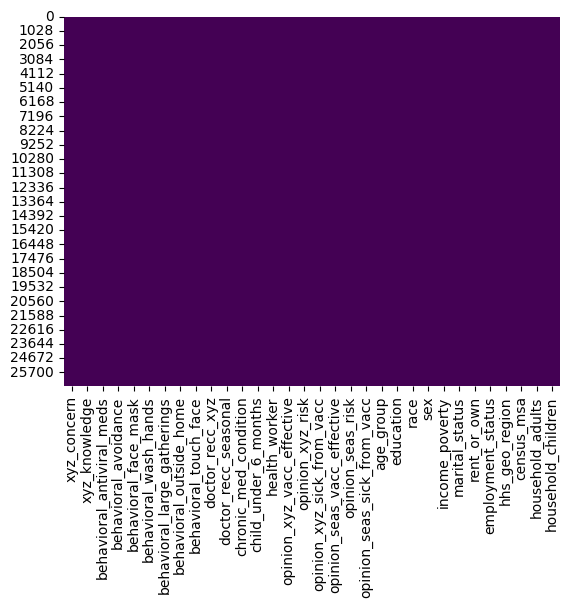

In [61]:
# Visualising missing data
sns.heatmap(x.isnull(), cbar=False, cmap='viridis')

In [62]:
# Standardising the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [63]:
# Train and predict with the logistic regression model for h1n1_vaccine
model1 = LogisticRegression()
model1.fit(x_scaled, y.iloc[:, 0])
probabilities1 = model1.predict_proba(x_scaled)[:, 1]

In [64]:
# Train and predict with the logistic regression model for seasonal_vaccine
model2 = LogisticRegression()
model2.fit(x_scaled, y.iloc[:, 1])
probabilities2 = model2.predict_proba(x_scaled)[:, 1]

In [65]:
# Compute ROC AUC scores for logistic regression models
roc_auc_h1n1 = roc_auc_score(y.iloc[:, 0], probabilities1)
roc_auc_seasonal = roc_auc_score(y.iloc[:, 1], probabilities2)
print("ROC AUC for h1n1_vaccine: ", roc_auc_h1n1)
print("ROC AUC for seasonal_vaccine: ", roc_auc_seasonal)

ROC AUC for h1n1_vaccine:  0.8297504813968669
ROC AUC for seasonal_vaccine:  0.8464677195857924


In [66]:
# Prepare the submission dataframe
x_for_id = pd.read_csv('test_set_features.csv')
y_new = x_for_id[['respondent_id']]
y_new['h1n1_vaccine'] = probabilities1_test
y_new['seasonal_vaccine'] = probabilities2_test
y_new.to_csv('Ishan_Kanodia_Datahack.csv', index=False)

<ipython-input-66-864562cdcf2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_new['h1n1_vaccine'] = probabilities1_test
<ipython-input-66-864562cdcf2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_new['seasonal_vaccine'] = probabilities2_test


In [67]:
# Evaluate models using cross-validation with ROC AUC scoring
rf_model = RandomForestClassifier(n_estimators=100)
rf_scores = cross_val_score(rf_model, x_scaled, y.iloc[:, 0], cv=5, scoring='roc_auc')
print("Random Forest CV ROC AUC for h1n1_vaccine: ", rf_scores.mean())

Random Forest CV ROC AUC for h1n1_vaccine:  0.8223361235909179


In [68]:
# Load the test data
x_new = pd.read_csv('test_set_features.csv')
x_new.drop(['health_insurance', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)
x_new.drop('respondent_id', axis=1, inplace=True)

# Encode categorical variables in test data
x_new[col_names] = enc.transform(x_new[col_names])

# Handle missing values in test data
features_nan_new = [feature for feature in x_new.columns if x_new[feature].isnull().sum() > 0]
for feature in features_nan_new:
    median_value = x_new[feature].median()
    x_new[feature].fillna(median_value, inplace=True)

# Standardize the test data
x_new_scaled = scaler.transform(x_new)

# Predict probabilities for the test data
probabilities1_test = model1.predict_proba(x_new_scaled)[:, 1]
probabilities2_test = model2.predict_proba(x_new_scaled)[:, 1]

In [69]:
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_scores = cross_val_score(gb_model, x_scaled, y.iloc[:, 0], cv=5, scoring='roc_auc')
print("Gradient Boosting CV ROC AUC for h1n1_vaccine: ", gb_scores.mean())

Gradient Boosting CV ROC AUC for h1n1_vaccine:  0.8348507072150795


In [70]:
rf_scores_seasonal = cross_val_score(rf_model, x_scaled, y.iloc[:, 1], cv=5, scoring='roc_auc')
print("Random Forest CV ROC AUC for seasonal_vaccine: ", rf_scores_seasonal.mean())

Random Forest CV ROC AUC for seasonal_vaccine:  0.8462409009968906


In [71]:
gb_scores_seasonal = cross_val_score(gb_model, x_scaled, y.iloc[:, 1], cv=5, scoring='roc_auc')
print("Gradient Boosting CV ROC AUC for seasonal_vaccine: ", gb_scores_seasonal.mean())

Gradient Boosting CV ROC AUC for seasonal_vaccine:  0.8552393106782581
